<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.004468,60.294284,74.907160,0.000750,168.206662,168.205764,0.000898
1,0.0,1.0,96.871926,71.136469,95.530258,0.001063,273.539717,273.538563,0.001154
2,0.0,2.0,46.634901,94.741812,83.475557,0.000166,234.852437,234.852581,-0.000144
3,0.0,3.0,86.024110,92.016207,81.848435,0.000152,269.888904,269.888963,-0.000059
4,0.0,4.0,73.827473,96.703436,38.612142,-0.000051,219.143000,219.143317,-0.000317
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.596754,87.191779,31.957770,-0.000357,180.745945,180.746446,-0.000501
249996,999.0,246.0,66.617613,36.490863,72.659592,0.000936,185.769004,185.768144,0.000860
249997,999.0,247.0,60.753275,99.496735,71.084075,-0.000018,241.334066,241.334025,0.000041
249998,999.0,248.0,47.526080,29.052711,29.499410,0.000301,116.078502,116.078479,0.000023


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    23.004468  60.294284  74.907160  ...  168.206662  168.205764  0.000898
      1.0    96.871926  71.136469  95.530258  ...  273.539717  273.538563  0.001154
      2.0    46.634901  94.741812  83.475557  ...  234.852437  234.852581 -0.000144
      3.0    86.024110  92.016207  81.848435  ...  269.888904  269.888963 -0.000059
      4.0    73.827473  96.703436  38.612142  ...  219.143000  219.143317 -0.000317
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  51.596754  87.191779  31.957770  ...  180.745945  180.746446 -0.000501
      246.0  66.617613  36.490863  72.659592  ...  185.769004  185.768144  0.000860
      247.0  60.753275  99.496735  71.084075  ...  241.334066  241.334025  0.000041
      248.0  47.526080  29.052711  29.499410  ...  116.078502  116.078479  0.000023
      249.0  97.191040  32.240629  48.309479  ...  187.742884  187.741378  0.001506

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    23.004468  60.294284  74.907160  ...  168.206662  168.205764  0.000898
      1.0    96.871926  71.136469  95.530258  ...  273.539717  273.538563  0.001154
      2.0    46.634901  94.741812  83.475557  ...  234.852437  234.852581 -0.000144
      3.0    86.024110  92.016207  81.848435  ...  269.888904  269.888963 -0.000059
      4.0    73.827473  96.703436  38.612142  ...  219.143000  219.143317 -0.000317
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  51.596754  87.191779  31.957770  ...  180.745945  180.746446 -0.000501
      246.0  66.617613  36.490863  72.659592  ...  185.769004  185.768144  0.000860
      247.0  60.753275  99.496735  71.084075  ...  241.334066  241.334025  0.000041
      248.0  47.526080  29.052711  29.499410  ...  116.078502  116.078479  0.000023
      249.0  97.191040  32.240629  48.309479  ...  187.742884  187.741378  0.001506

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,23.004468,60.294284,74.907160,0.000750,168.206662,168.205764,0.000898
1,0.0,1.0,96.871926,71.136469,95.530258,0.001063,273.539717,273.538563,0.001154
2,0.0,2.0,46.634901,94.741812,83.475557,0.000166,234.852437,234.852581,-0.000144
3,0.0,3.0,86.024110,92.016207,81.848435,0.000152,269.888904,269.888963,-0.000059
4,0.0,4.0,73.827473,96.703436,38.612142,-0.000051,219.143000,219.143317,-0.000317
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.596754,87.191779,31.957770,-0.000357,180.745945,180.746446,-0.000501
249996,999.0,246.0,66.617613,36.490863,72.659592,0.000936,185.769004,185.768144,0.000860
249997,999.0,247.0,60.753275,99.496735,71.084075,-0.000018,241.334066,241.334025,0.000041
249998,999.0,248.0,47.526080,29.052711,29.499410,0.000301,116.078502,116.078479,0.000023


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    23.004468  60.294284  74.907160  ...  168.206662  168.205764  0.000898
      1.0    96.871926  71.136469  95.530258  ...  273.539717  273.538563  0.001154
      2.0    46.634901  94.741812  83.475557  ...  234.852437  234.852581 -0.000144
      3.0    86.024110  92.016207  81.848435  ...  269.888904  269.888963 -0.000059
      4.0    73.827473  96.703436  38.612142  ...  219.143000  219.143317 -0.000317
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  51.596754  87.191779  31.957770  ...  180.745945  180.746446 -0.000501
      246.0  66.617613  36.490863  72.659592  ...  185.769004  185.768144  0.000860
      247.0  60.753275  99.496735  71.084075  ...  241.334066  241.334025  0.000041
      248.0  47.526080  29.052711  29.499410  ...  116.078502  116.078479  0.000023
      249.0  97.191040  32.240629  48.309479  ...  187.742884  187.741378  0.001506

[250000 rows x 7 columns]

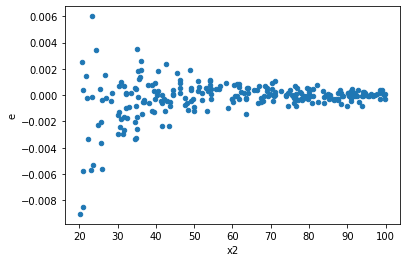

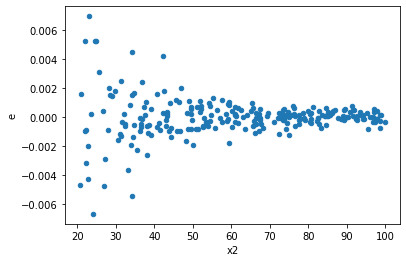

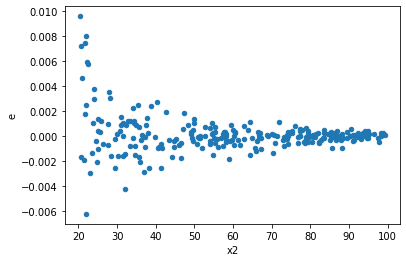

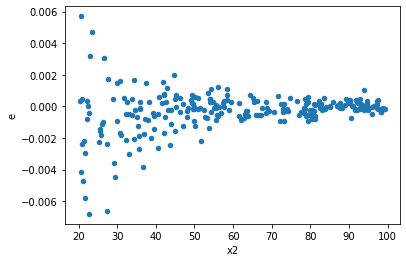

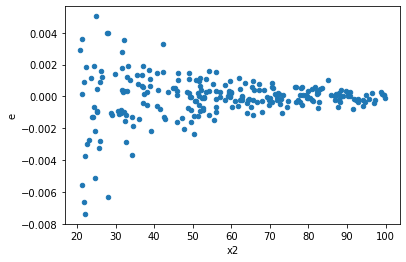

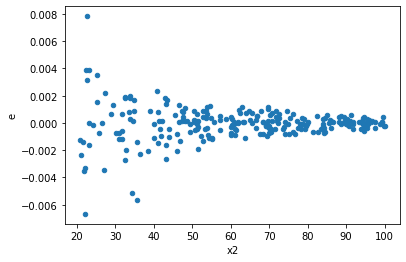

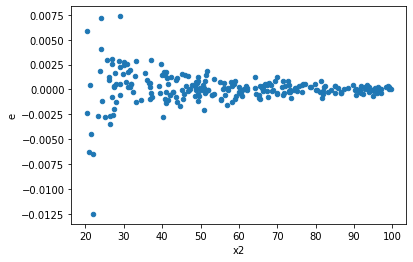

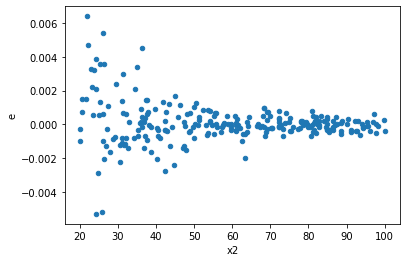

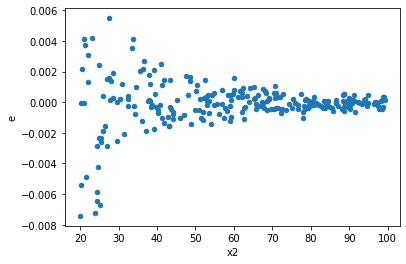

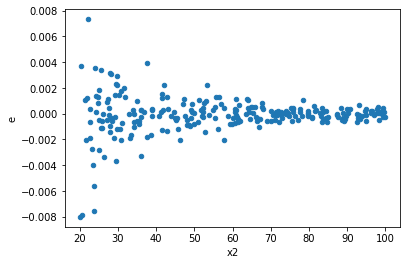

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,127.0,117.0,2.1247916256696483e-05,0.00046364368094197844,1.6730642721808255e-07,3.962766503777594e-06,23.68568004032601,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,118.0,126.0,1.5896804572500785e-05,0.00037859766766226255,1.3471868281780326e-07,3.0047433941449408e-06,22.303835899350553,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,126.0,118.0,0.00017615762218072713,0.00022985985676049703,1.3980763665137073e-06,1.9479648878008222e-06,1.3933179434670915,0.06911517741931816,0.9654424112903409,0.03455758870965908,Reject001=1 : Homoscedasticity
9.0,121.0,123.0,2.2979260273859426e-05,0.0005267050661342207,1.8991124193272252e-07,4.282155009221307e-06,22.54819127947303,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,131.0,113.0,1.967859649520196e-05,0.0004301136371544852,1.5021829385650352e-07,3.8063153730485414e-06,25.338560805946415,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
14.0,120.0,124.0,0.0001116713452067546,0.0001734628131274467,9.305945433896216e-07,1.3988936542536024e-06,1.5032257218683402,0.02496249597013045,0.9875187520149348,0.012481247985065225,Reject001=1 : Homoscedasticity
15.0,126.0,118.0,0.00017335659171433226,0.00031006198887926817,1.375845965986764e-06,2.62764397355312e-06,1.909838774479787,0.0004321424656426043,0.9997839287671787,0.00021607123282130214,Reject001=0 : Heteroscedasticity
16.0,118.0,126.0,0.0001447790457036877,0.0001898081176535479,1.2269410652854891e-06,1.506413632171015e-06,1.227779943790941,0.2573709731346223,0.8713145134326888,0.12868548656731116,Reject001=1 : Homoscedasticity
17.0,116.0,128.0,0.00022088212777657588,0.00030165994505749674,1.904156273935999e-06,2.3567183207616933e-06,1.2376706434342297,0.23892040164144412,0.8805397991792779,0.11946020082072206,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,117.0,2.1247916256696483e-05,0.00046364368094197844,1.6730642721808255e-07,3.962766503777594e-06,23.68568004032601,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,123.0,121.0,0.0002720587996329526,0.00020468709152719473,2.211860159617501e-06,1.6916288555966506e-06,0.7647991887015071,0.13977895161343248,Reject001=1 : Homoscedasticity
2.0,116.0,128.0,0.0005292867419933571,4.064997957589687e-05,4.562816741322044e-06,3.175779654366943e-07,0.06960129749692255,5.609324716118649e-38,Reject001=0 : Heteroscedasticity
3.0,118.0,126.0,1.5896804572500785e-05,0.00037859766766226255,1.3471868281780326e-07,3.0047433941449408e-06,22.303835899350553,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,131.0,113.0,0.00038691848146331695,0.0001153502950027179,2.9535761943764653e-06,1.0207990708205124e-06,0.34561460536013533,7.1844838034343955e-09,Reject001=0 : Heteroscedasticity
5.0,126.0,118.0,0.00017615762218072713,0.00022985985676049703,1.3980763665137073e-06,1.9479648878008222e-06,1.3933179434670915,0.06911517741931816,Reject001=1 : Homoscedasticity
6.0,130.0,114.0,0.00043625073492757085,0.0002166434022226035,3.3557748840582374e-06,1.900380721250908e-06,0.5663016104801171,0.0017502652470688892,Reject001=0 : Heteroscedasticity
7.0,116.0,128.0,0.00026216877660671667,0.00011436654735083872,2.26007566040273e-06,8.934886511784275e-07,0.3953357256275279,6.283912223404944e-07,Reject001=0 : Heteroscedasticity
8.0,127.0,117.0,0.0004009128697195674,0.00016966123835427134,3.1567942497603732e-06,1.4500960543100115e-06,0.4593571641294284,2.08032850022104e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    651
Reject001=1 : Homoscedasticity      349
Name: Result_test, dtype: int64